## Breast Cancer Classification

### Importing dataset and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('BreastCancerData.csv', index_col='Sample code number')

In [3]:
dataset.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
dataset.shape

(683, 10)

In [14]:
dataset.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 1000025 to 897471
Data columns (total 10 columns):
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null int64
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(10)
memory usage: 58.7 KB


<hr>

In [5]:
(dataset.isnull().sum()/len(dataset)*100).sort_values(ascending=False)

Class                          0.0
Mitoses                        0.0
Normal Nucleoli                0.0
Bland Chromatin                0.0
Bare Nuclei                    0.0
Single Epithelial Cell Size    0.0
Marginal Adhesion              0.0
Uniformity of Cell Shape       0.0
Uniformity of Cell Size        0.0
Clump Thickness                0.0
dtype: float64

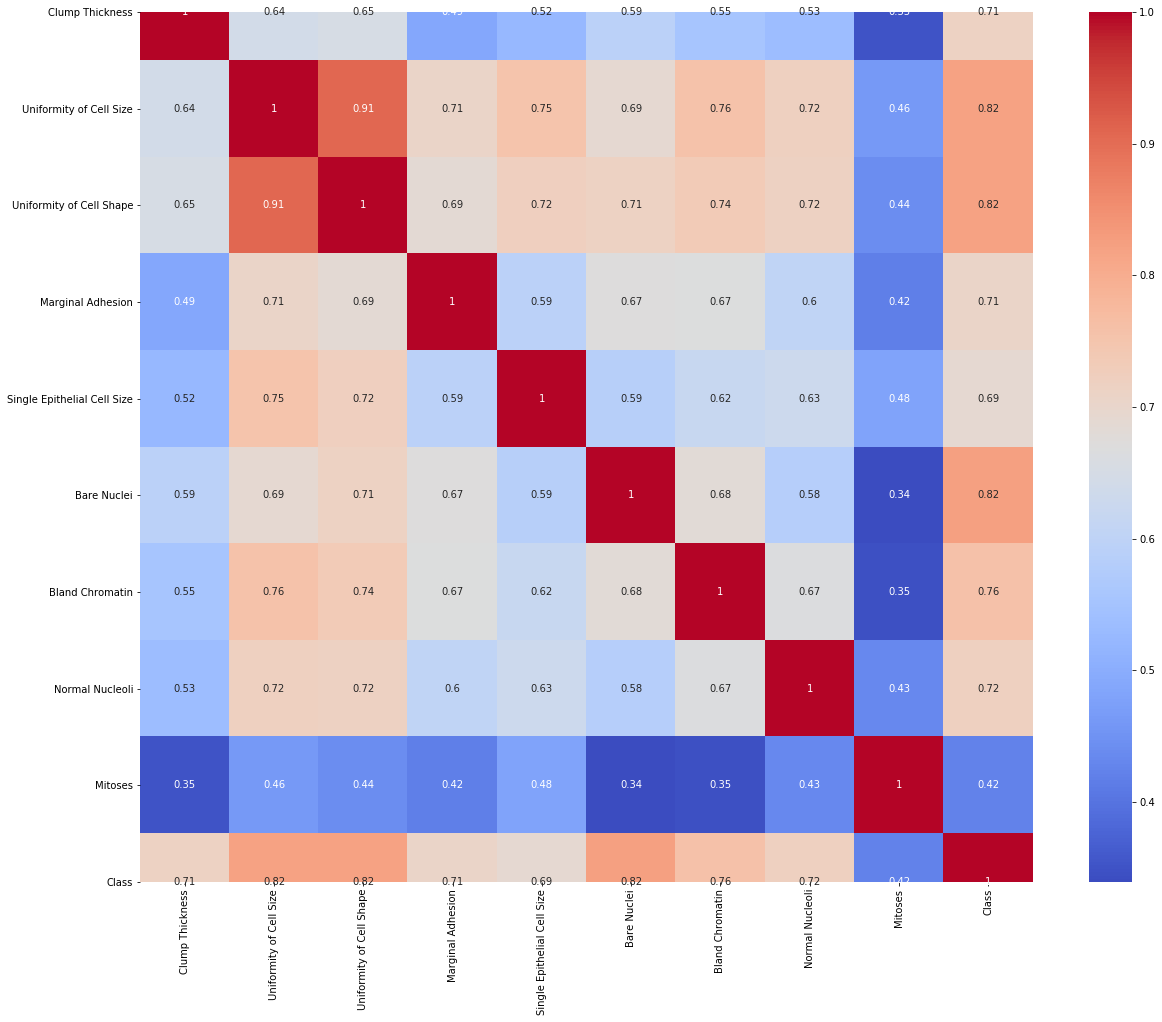

In [10]:
plt.figure(figsize=(20,16))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')

<hr>

### Univariate analysis

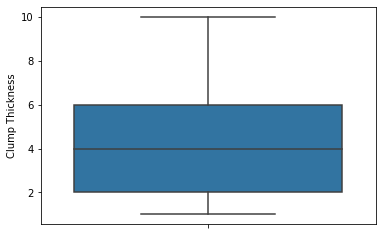

In [12]:
sns.boxplot(y=dataset['Clump Thickness'])
plt.show()

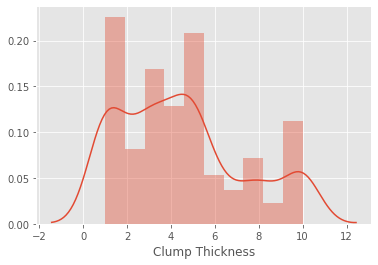

In [19]:
from matplotlib import style
style.use('ggplot')

sns.distplot(dataset['Clump Thickness'])
plt.show()

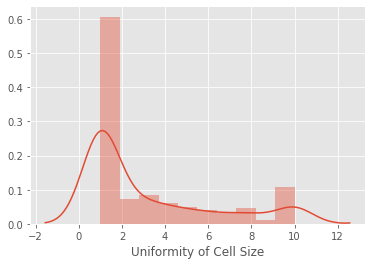

In [20]:
sns.distplot(dataset['Uniformity of Cell Size'])
plt.show()

### Bivariate analysis

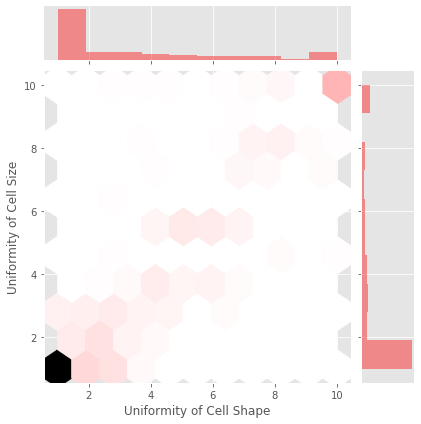

In [23]:
sns.jointplot('Uniformity of Cell Shape', 'Uniformity of Cell Size', dataset, kind='hex', color='r')
plt.show()

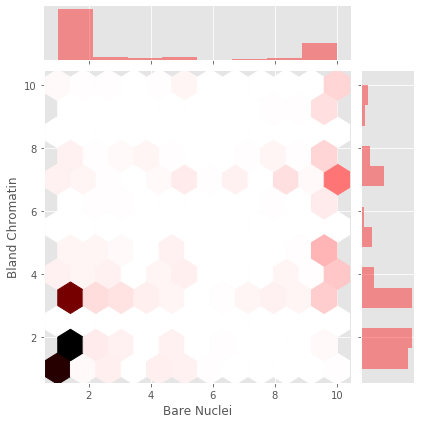

In [25]:
sns.jointplot('Bare Nuclei', 'Bland Chromatin', dataset, kind='hex', color='r')
plt.show()

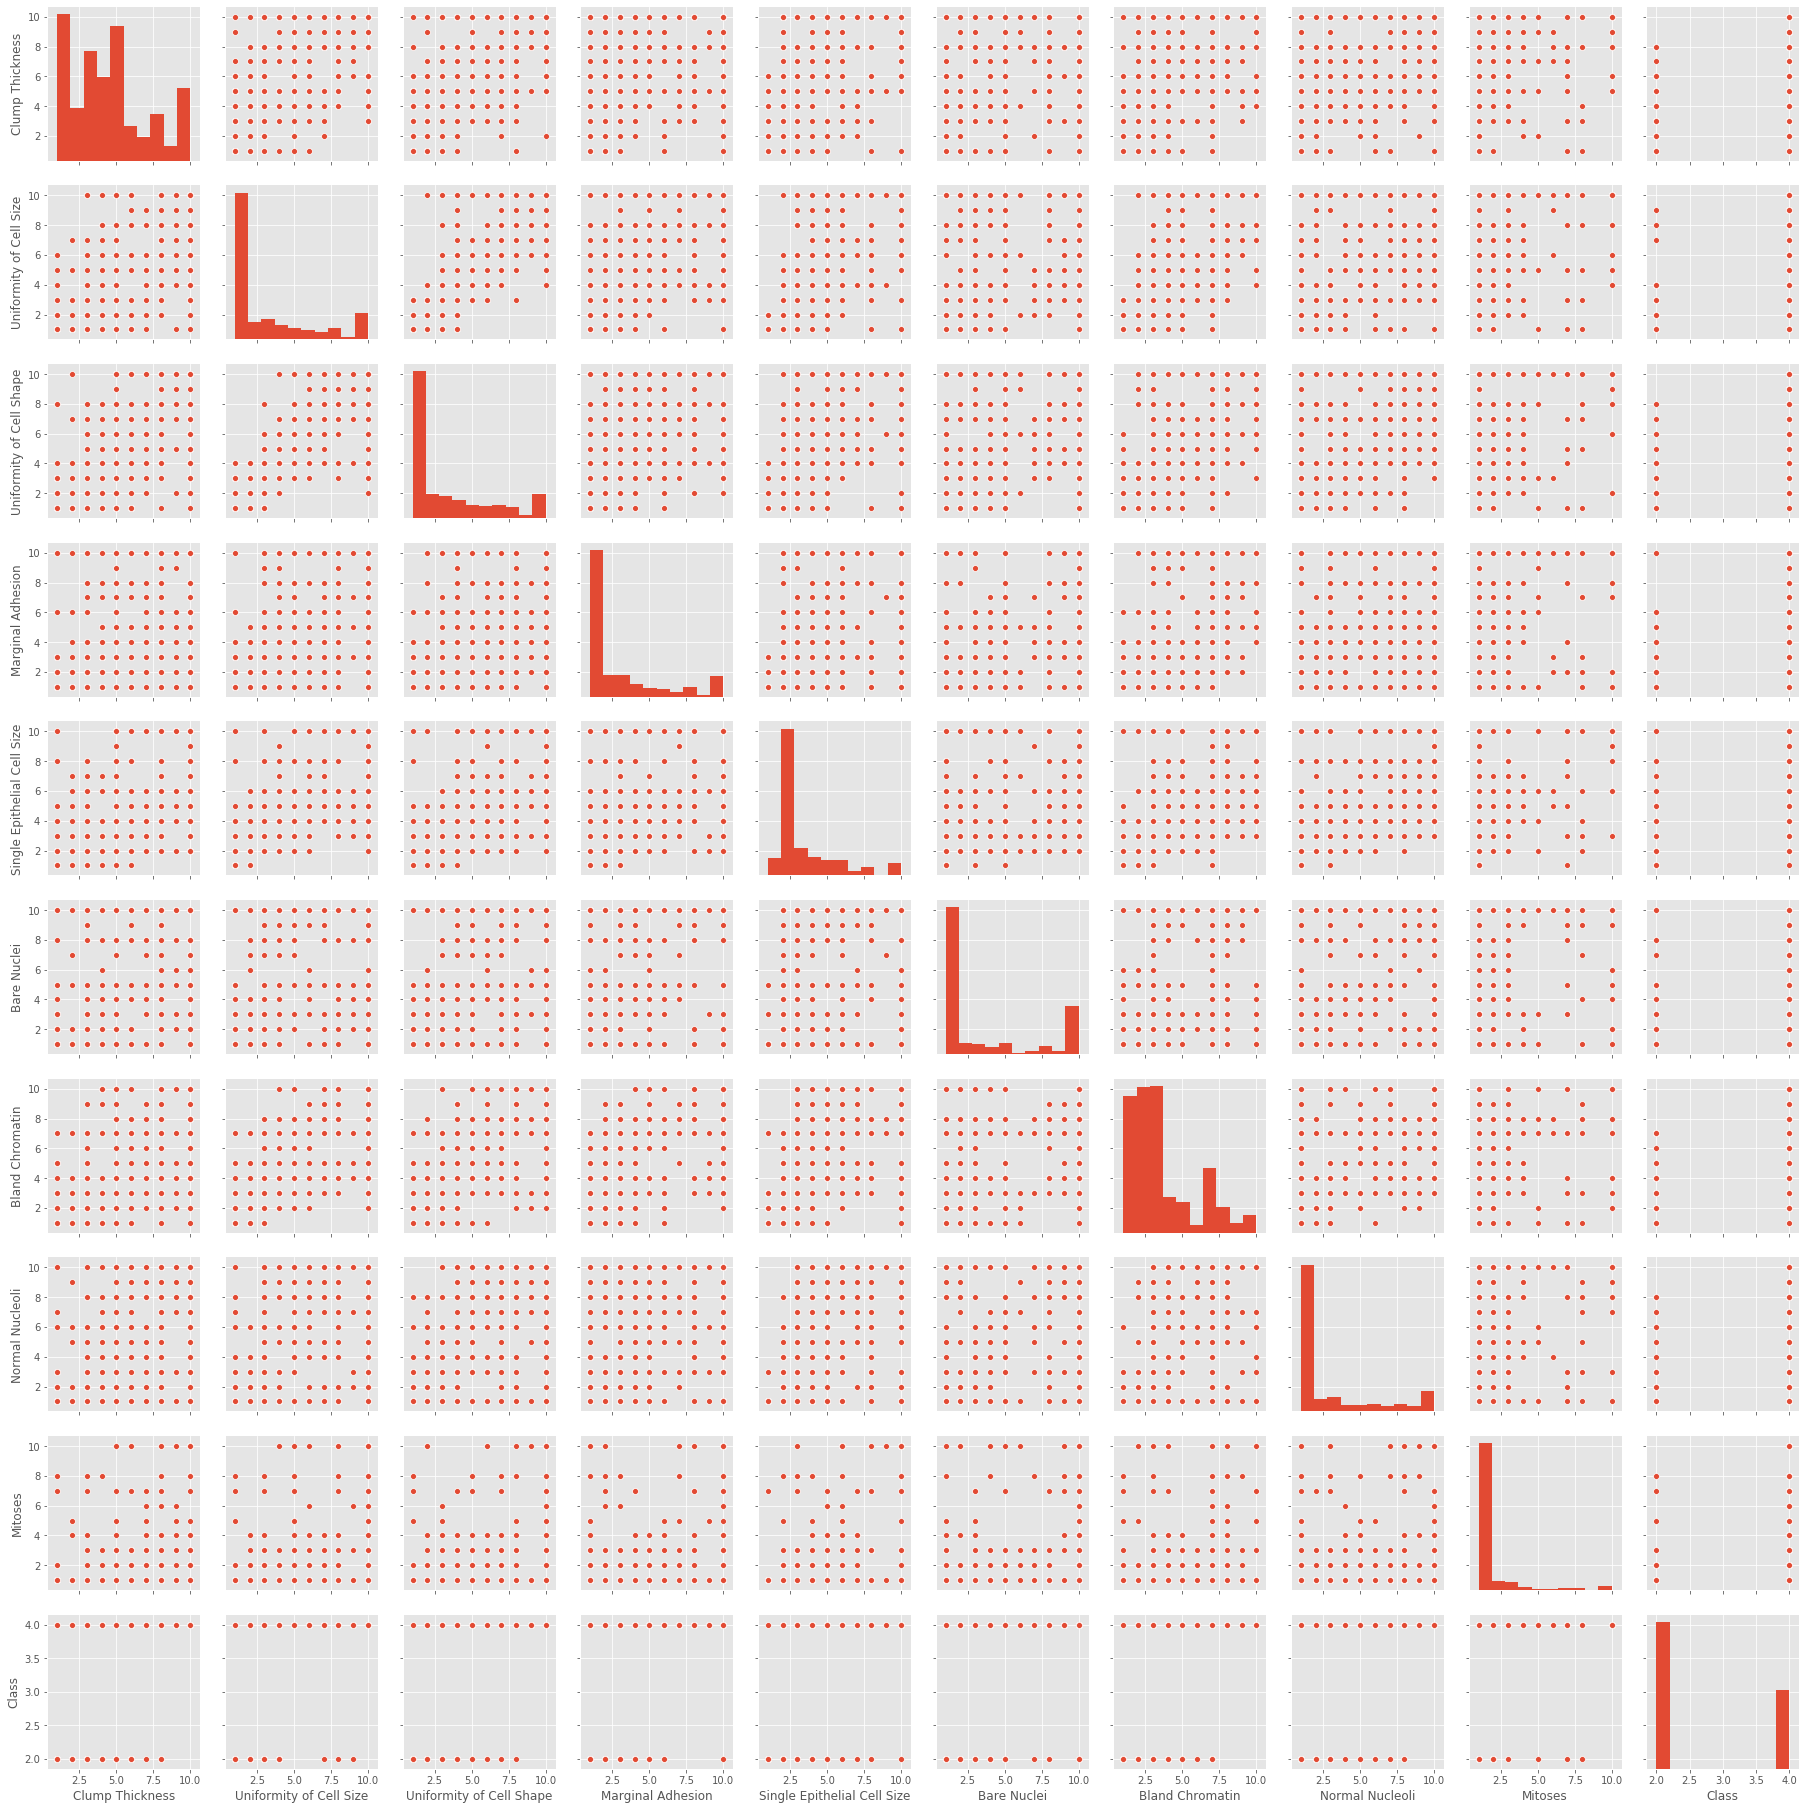

In [27]:
sns.pairplot(dataset)
plt.show()

<hr>

In [45]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting test and training data

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training and testing

#### Logistic regression

In [37]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score, f1_score
print(accuracy_score(y_test, y_pred))
# print(f1_score(y_test, y_pred))

0.9473684210526315


#### KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = [
    { 'n_neighbors': [3, 4, 5, 6] }
]
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

In [50]:
print(accuracy_score(y_test, y_pred))
print(grid_search.best_params_)

0.9473684210526315
{'n_neighbors': 5}


#### SVM

In [51]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC()
param_grid = [
    { 'kernel': ['poly'], 'degree': [2, 3, 4], 'C': [1.0, 10.0, 100.0] },
    { 'kernel': ['rbf'], 'gamma': ['scale', 'auto'], 'C': [1.0, 10.0, 100.0] },
    { 'kernel': ['sigmoid'], 'gamma': ['scale', 'auto'], 'C': [0.01, 1.0, 10.0, 100.0] }
]

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
y_predicted = grid_search.predict(X_test)

In [54]:
print(accuracy_score(y_test, y_predicted))
print(grid_search.best_params_)

0.9473684210526315
{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}


### Stacking

In [58]:
from sklearn.ensemble import StackingClassifier
estimators = [('knn', KNeighborsClassifier(n_neighbors=5)),('svm', SVC(kernel='rbf', gamma='scale', C=10))]
clf = StackingClassifier(estimators=estimators)
clf.fit(X_train, y_train)
y_predicted = grid_search.predict(X_test)

In [59]:
print(accuracy_score(y_test, y_predicted))

0.9473684210526315
